In [1]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index and display first five rows
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Add headers to look like a browser
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/91.0.4472.124 Safari/537.36"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Find the correct table
tables = soup.find_all("table")

# Find the table with Tesla quarterly revenue
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        for row in table.find_all("tr")[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace('$', '').replace(',', '')
                if revenue:
                    tesla_revenue.loc[len(tesla_revenue.index)] = [date, revenue]
        break  # Exit once found

# Clean and display last rows
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()


,Date,Revenue
58,2010-09-30,31
59,2010-06-30,28
60,2010-03-31,21
61,2009-09-30,46
62,2009-06-30,27


In [6]:
# Download GME stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index and show first 5 rows
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Add browser-like headers to avoid HTTP 403 Forbidden
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/91.0.4472.124 Safari/537.36"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Initialize DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Look through all tables to find the one with quarterly revenue
tables = soup.find_all("table")

for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        for row in table.find_all("tr")[1:]:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace('$', '').replace(',', '')
                if revenue:
                    gme_revenue.loc[len(gme_revenue.index)] = [date, revenue]
        break  # Stop after finding the correct table

# Drop empty rows
gme_revenue.dropna(inplace=True)

# Display the last 5 rows
print(gme_revenue.tail())


          Date Revenue
61  2010-01-31    3524
62  2009-10-31    1835
63  2009-07-31    1739
64  2009-04-30    1981
65  2009-01-31    3492


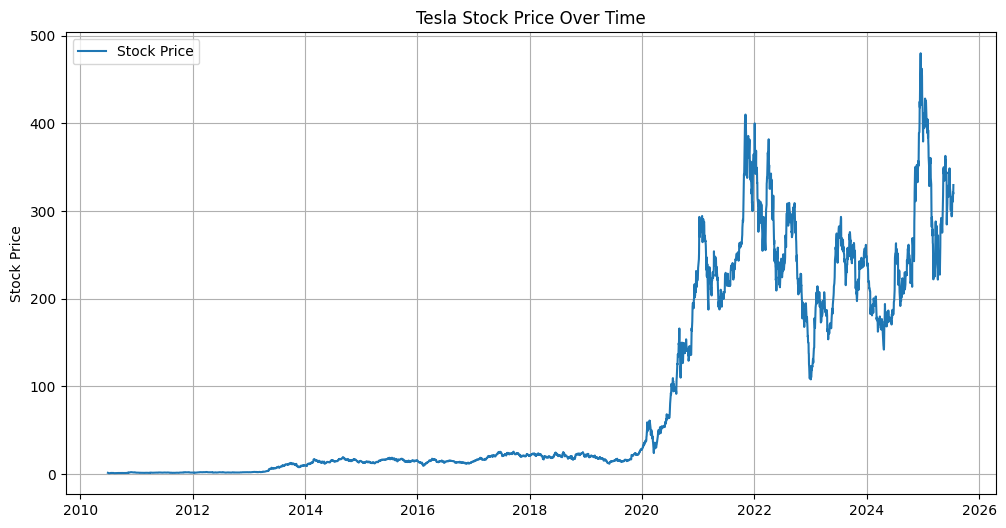

In [9]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.plot(stock_data.Date, stock_data.Close, label="Stock Price")
    ax1.set_ylabel("Stock Price")
    ax1.set_title(title)
    ax1.legend(loc="upper left")

    plt.grid()
    plt.show()

# Plot Tesla stock
make_graph(tesla_data, tesla_revenue, "TSLA", "Tesla Stock Price Over Time")


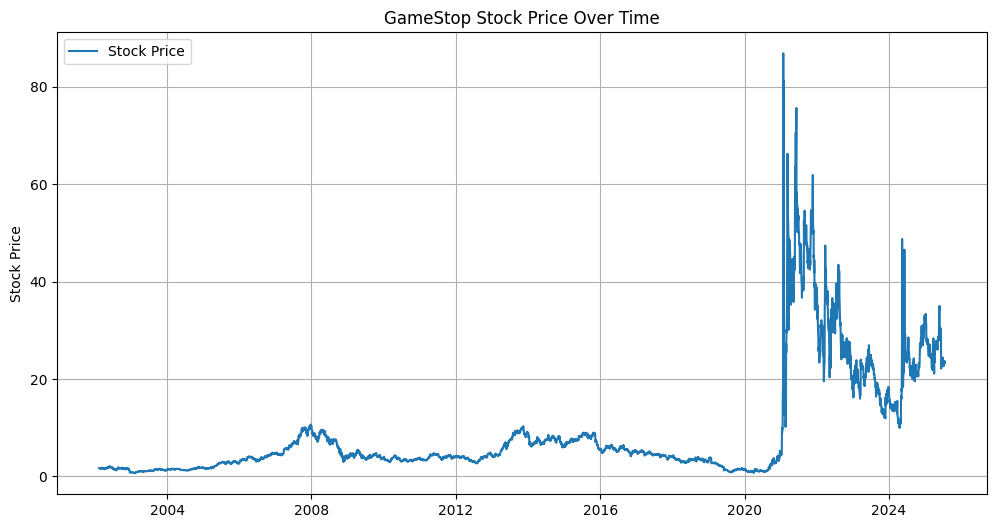

In [10]:
make_graph(gme_data, gme_revenue, "GME", "GameStop Stock Price Over Time")
